In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
from scipy.stats import norm, multivariate_normal, gamma, invgamma, multinomial, dirichlet, uniform, binom, invwishart
from tqdm import tqdm
import sys
from sklearn.mixture import GaussianMixture
os.chdir('../code')
from mv_gibbs import MvGibbsSampler as mv


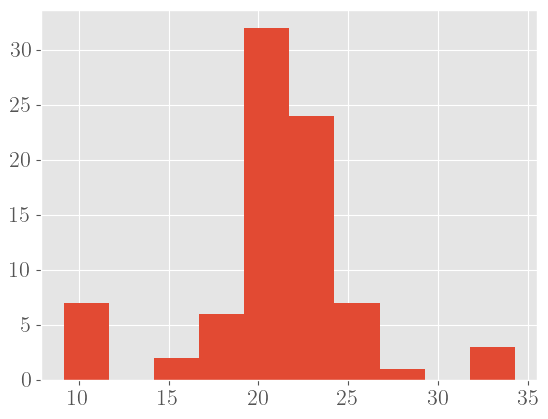

In [2]:
df = pd.read_csv('../../homework_4/data/galaxies.csv')
X = df[['x']].to_numpy()
plt.hist(X);

In [3]:
def make_pdf(x, weights, means, sigmas):
    pdf = np.sum(weights * norm(means, sigmas).pdf(np.vstack([x] * k).T), axis=1)
    return pdf

In [4]:
def make_conf(x, gs):
    pdfs = []
    for n in range(gs.weights.shape[0]):
        weights = gs.weights[n].flatten()
        means = gs.means[n].flatten()
        sigmas = np.sqrt(gs.covs[n]).flatten()
        pdf = make_pdf(x, weights, means, sigmas)
        pdfs.append(pdf)
    pdfs = np.array(pdfs)
    conf = np.quantile(pdfs, [.05, 1-0.05], axis=0)
    return np.mean(pdfs, axis=0), *conf

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 128.43it/s]


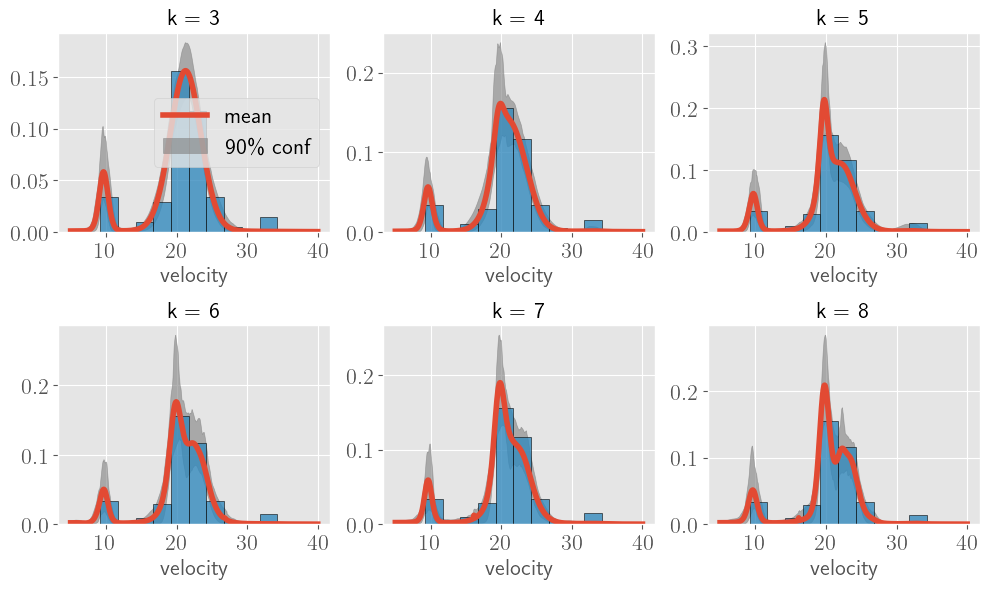

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
ks = [3,4,5,6,7,8]
x = np.linspace(5, 40, 1000)
for i, k in enumerate(ks):
    gs = mv(X.reshape(-1, 1), n_it=50, nu_0=1, Sig_0=10, Psi_0=1, k=k, alpha=1, mu_0=0)
    gs.fit(n_burn=0, n_thin=1)
    confs = make_conf(x, gs)
    axes[i].plot(x, confs[0], label='mean')
    axes[i].fill_between(x, *confs[1:], color='gray', alpha=.6, label='90\% conf')
    
    axes[i].hist(df['x'].to_numpy(), density=True, alpha=.8, edgecolor='black')
    axes[i].set_title(f'k = {k}')
    axes[i].set_xlabel('velocity')
    axes[0].legend()
    
fig.tight_layout() 


In [15]:
plt.savefig('../figures/galaxies.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>